In [8]:
## import needed libraries
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro

In [2]:
## load data
df_control = pd.read_csv(r'data/control_group.csv', sep=';')
df_test = pd.read_csv(r'data/test_group.csv', sep=';')

In [3]:
## check
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
## check
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [5]:
## concatente two dfs
df_raw = pd.concat([df_control, df_test])
df = df_raw.copy()

In [6]:
df.nunique()

Campaign Name           2
Date                   30
Spend [USD]            60
# of Impressions       59
Reach                  59
# of Website Clicks    59
# of Searches          58
# of View Content      56
# of Add to Cart       59
# of Purchase          55
dtype: int64

In [7]:
df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,60.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2425.750000,91775.881356,70868.644068,5682.593220,2321.813559,1900.169492,1087.220339,522.000000
std,381.130461,32465.070636,31023.653515,1754.777559,669.040576,687.263844,430.205246,196.973917
min,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2073.750000,68853.500000,43230.000000,4227.500000,1962.500000,1249.000000,848.500000,340.000000
50%,2420.500000,95843.000000,76219.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000
75%,2727.500000,117315.000000,95490.500000,7218.500000,2778.500000,2424.000000,1386.500000,693.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


<AxesSubplot:xlabel='Campaign Name', ylabel='# of Purchase'>

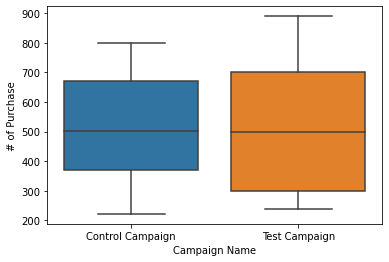

In [9]:
## check data distribution
sns.boxplot(x='Campaign Name', y='# of Purchase', data=df) #there is no outlier

In [10]:
## get top ten by number of purchase
df.sort_values(by='# of Purchase', ascending=False).iloc[:10]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
6,Test Campaign,7.08.2019,2838,53986.0,42148.0,4221.0,2733.0,2182.0,1301.0,890.0
8,Test Campaign,9.08.2019,2652,45511.0,31598.0,8259.0,2899.0,2761.0,1200.0,845.0
12,Test Campaign,13.08.2019,1972,65827.0,49531.0,7568.0,2213.0,2058.0,1391.0,812.0
20,Control Campaign,21.08.2019,1803,74654.0,59873.0,5691.0,2711.0,2496.0,1460.0,800.0
11,Control Campaign,12.08.2019,2319,116639.0,100189.0,2993.0,1397.0,1147.0,1439.0,794.0
13,Control Campaign,14.08.2019,1875,145248.0,118632.0,4521.0,1209.0,1149.0,1339.0,788.0
26,Test Campaign,27.08.2019,2915,111469.0,92159.0,6435.0,2976.0,2552.0,992.0,771.0
4,Test Campaign,5.08.2019,2297,114295.0,95138.0,5863.0,2106.0,858.0,956.0,768.0
12,Control Campaign,13.08.2019,2697,82847.0,68214.0,6554.0,2390.0,1975.0,1794.0,766.0
22,Control Campaign,23.08.2019,2496,129880.0,109413.0,4410.0,2896.0,2496.0,1913.0,766.0


In [13]:
## check if the distribution is normal
shapiro(df.loc[df['Campaign Name'] == 'Test Campaign', '# of Purchase'])

ShapiroResult(statistic=0.9181894659996033, pvalue=0.024077769368886948)

<h5>The null hypothesis about the normal distribution of the data is rejected</h5>

In [16]:
## check if the distribution is normal
shapiro(df.loc[df['Campaign Name'] == 'Control Campaign', '# of Purchase'])

ShapiroResult(statistic=nan, pvalue=1.0)

In [17]:
## Mann-Whitney test
mannwhitneyu(df.loc[df['Campaign Name'] == 'Test Campaign', '# of Purchase'], df.loc[df['Campaign Name'] == 'Control Campaign', '# of Purchase'])

MannwhitneyuResult(statistic=431.0, pvalue=0.3922211218524694)

In [18]:
control = df.loc[df['Campaign Name'] == 'Control Campaign', '# of Purchase'].values
test = df.loc[df['Campaign Name'] == 'Test Campaign', '# of Purchase'].values

AxisError: axis 1 is out of bounds for array of dimension 1

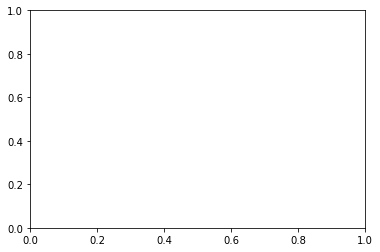

<Figure size 1440x360 with 0 Axes>

In [21]:
f, ax = plt.subplots()
# plt.figure(figsize=(20,5))
sns.kdeplot(np.mean(control, axis=1), shade=True, label='Control Campaign')
sns.kdeplot(np.mean(test, axis=1), shade=True, label='Test Campaign')
plt.title('Sample mean distribution')